
---

# Exploring Causality in Data Science with

![Red Apple on Wooden Table](https://www.shutterstock.com/image-photo/red-apple-on-wooden-table-260nw-308546741.jpg)

In our quest to understand causality, let's start with a peculiar but engaging metaphor. Imagine a red apple sitting on a table. Now, ask yourself, "What does this apple have to do with causality?" Interestingly, there's no direct link between apples and causality, but our minds are wired to seek connections, even where none exist.

This tendency reflects our innate desire to ask "why?" Why an apple? Why am I reading about it in a data science context? These questions are fundamental to our understanding of the world, driving us to construct causal narratives to make sense of our surroundings.

However, traditional statistical methods struggle to grapple with causality. This leads us to explore the three common pitfalls in statistics when dealing with causality.





---
![Graph](1_9HqEXfiYYwAZ3_tw2eJpiA.png)
**Trap 1: The Illusion of Spurious Correlations**
The common saying "correlation does not imply causation" encapsulates the essence of spurious correlations. These are statistical correlations that lack causal connections. For instance, a whimsically high correlation (66%) exists between the annual number of people drowning in pools and the number of films featuring Nicolas Cage. Despite the apparent correlation, these two variables have no causal relationship. This example, though amusing, underscores the need for caution in interpreting correlations. Demonstrating statistical significance poses challenges in real-world scenarios, such as determining appropriate p-value thresholds and data volume. However, even statistically significant results do not automatically imply a causal relationship. This point is humorously illustrated by a satirical, yet statistically sound, narrative linking stork sightings to birth rates.

**Trap 2: Simpson’s Paradox – The Contradiction of Data Interpretation**
Simpson's Paradox occurs when data yields conflicting conclusions based on its segmentation. Imagine a study on a heart disease treatment. Initial data analysis might suggest the treatment worsens heart disease risk. However, further examination, segmented by sex, reveals a reduction in heart disease risk within each subpopulation.
![graph](2.png)
Judea Pearl aptly summarizes this paradox: a treatment beneficial for both men and women can appear detrimental when viewing the entire population. A real-world instance of this paradox is observed in comparing the batting averages of Derek Jeter and David Justice over two years. Analyzed individually, Justice outperforms in each year, but Jeter leads when combining data across both years. This paradox illustrates the importance of how data is segmented and analyzed, emphasizing the role of causal effects in identifying true impacts of variables while accounting for confounders.
![graph](3.png)

**Trap 3: The Symmetry Problem in Traditional Statistics**

Traditional statistical methods often stumble on causality due to the intrinsic symmetry in algebra, where both sides of an equation are equivalent. Causality, however, is inherently asymmetric – causes lead to effects, not vice versa. Consider modeling the relationship between a disease and its symptoms.

Algebraically, inverting the equation may suggest symptoms cause the disease, an obviously false implication. In data analysis, a correlation between two variables X and Y implies a similar correlation in the opposite direction, Y and X. This symmetry precludes the interpretation of purely data-driven models, like many in machine learning, as causal. Nonetheless, with the right assumptions, it may be possible to uncover causal structures from data, a topic further explored in articles on causal discovery.
![graph](5.png)
![graph](6.png)

---


# Understanding Causality: A Mathematical Perspective

Before delving into the mathematical representation of causality, it's important to grasp its core concept. Causality transcends mere statistical correlations, delving deeper into the web of causal relationships within a system.

## Defining Causality

In the realm of causality, we say that one variable, X, causes another variable, Y, when any intervention in X leads to a change in Y. Conversely, manipulating Y does not necessarily lead to a change in X. This stands in contrast to correlation, where relationships are symmetric — if X is correlated with Y, then Y is also correlated with X. However, if X causes Y, the reverse may not be true.

![Causality Visualization](7.gif) 

## Structural Causal Models (SCMs)

Causality is encapsulated mathematically in what are known as Structural Causal Models (SCMs), which consist of two primary components: a graph and a set of equations. The graph is typically a Directed Acyclic Graph (DAG), while the equations form a Structural Equation Model (SEM).

### Directed Acyclic Graphs (DAGs)

DAGs visualize the causal structure, depicting the flow of information in a single direction, without any loops. Each vertex (or circle) in a DAG symbolizes a variable, and the directed edges (or arrows) represent causation, connecting a variable directly to its causative factors (parents).

### Structural Equation Models (SEMs)

SEMs describe the relationships between variables. Unique to SEMs are two characteristics: asymmetry, where equality holds only in one direction, preventing the inversion of the equations to form alternative models; and the potential for non-parametric forms, allowing for unknown functional relationships.

Interestingly, SEMs can offer more detailed insights than DAGs, showing not just the causal connections but also the nature of these relationships. However, the clarity offered by DAGs in illustrating causal relationships is invaluable and often not as apparent in SEMs. Moreover, the adoption of DAGs has unlocked methods like d-separation, crucial for assessing causal effects.

![Example SCM](8.png) 

Through these mathematical tools, causality is demystified, offering a robust framework for understanding the intricate web of cause and effect that influences our observations.

Addressing a Different Class of Inquiries

Machine Learning has excelled in addressing predictive questions, as articulated by Ajay Agrawal, Joshua Gans, and Avi Goldfarb in "Prediction Machines." They argue that while artificial intelligence may not encompass true intelligence, it provides a critical component - prediction. Indeed, machine learning enables a myriad of applications, ranging from language translation to facial recognition to autonomous vehicles. However, its efficacy is contingent upon framing problems as predictive tasks.

Nonetheless, machine learning is not a panacea. It thrives within well-defined parameters but falters when confronted with deviations from familiar data patterns. Consider the example of pricing strategies in the hotel industry: while low prices may correlate with low sales outside peak seasons, blindly increasing prices may not necessarily lead to higher sales. Machine learning struggles with such inverse causality problems, which necessitate answering "what if" questions, known as counterfactuals, prevalent in various domains from finance to public policy.

At the crux of these inquiries lies causal inference - the quest to unravel cause-and-effect relationships underlying observed phenomena. Whether it's optimizing business strategies or addressing societal dilemmas, causal questions are ubiquitous. Unfortunately, machine learning's reliance on correlation-based predictions falls short in tackling such inquiries.

Answering causal questions poses unique challenges, often underestimated. While the adage "association is not causation" is familiar, elucidating why this is true requires deeper understanding. This introduction to causal inference sets the stage for exploring how to bridge the gap between association and causation.

### "When Association Implies Causation"

Intuitively, we recognize the fallacy of equating association with causation. For instance, if schools providing tablets to students outperform those that do not, attributing this solely to tablet usage overlooks confounding factors, such as socioeconomic status. Thus, while tablets may be associated with academic success, causation remains uncertain. This distinction underscores the complexity of causal inference, a journey this book embarks upon.

---


In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

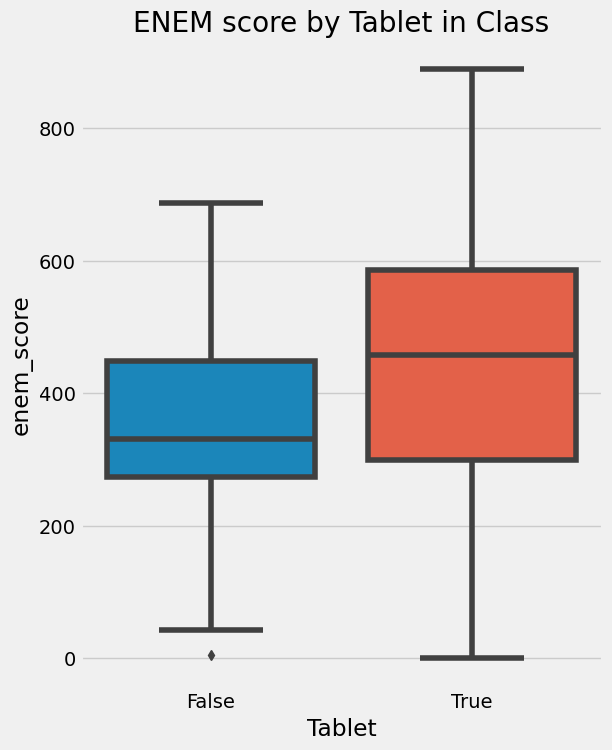

In [2]:
plt.figure(figsize=(6,8))
sns.boxplot(y="enem_score", x="Tablet", data=data).set_title('ENEM score by Tablet in Class')
plt.show()

Let's introduce some notation to establish a common language for discussing causality. Think of it as the lingua franca for our journey into the realm of causal inference, where we'll join fellow warriors in the battles ahead.

Firstly, we'll denote \( T_i \) as the treatment intake for unit \( i \):



$
T_i=\begin{cases}
1 \ \text{if unit i received the treatment}\\
0 \ \text{otherwise}\\
\end{cases}
$

Here, the treatment isn't necessarily a medical intervention; it could represent any intervention for which we seek to understand the effect. In our context, it signifies providing tablets to students. Sometimes, you might encounter \( D \) instead of \( T \) to denote the treatment.

Next, let's denote \( Y_i \) as the observed outcome variable for unit \( i \):

The outcome variable, \( Y_i \), is our point of interest. We aim to discern if the treatment has any impact on it. In our tablet example, it pertains to academic performance.

Now, here's where things get intriguing. The **fundamental problem of causal inference** arises because we can't observe the same unit both with and without treatment. It's akin to standing at a crossroads, able to see only one path ahead, as in Robert Frost's poem:

>Two roads diverged in a yellow wood,  
And sorry I could not travel both  
And be one traveler, long I stood  
And looked down one as far as I could  
To where it bent in the undergrowth;

To grapple with this, we often discuss **potential outcomes**. These outcomes are termed "potential" because they didn't materialize; instead, they signify **what might have occurred** had a treatment been administered. We differentiate between the potential outcome that did occur (factual) and the one that didn't (counterfactual).

To denote potential outcomes, we introduce an additional subscript:

- \( Y_{0i} \) represents the potential outcome for unit \( i \) without the treatment.
- \( Y_{1i} \) represents the potential outcome for the **same** unit \( i \) with the treatment.

At times, potential outcomes might be depicted as functions \( Y_i(t) \), so beware. \( Y_{0i} \) could be \( Y_i(0) \), and \( Y_{1i} \) could be \( Y_i(1) \). Here, we'll primarily use subscript notation.

Back to our example, \( Y_{1i} \) denotes the academic performance for student \( i \) if they were in a classroom with tablets. Whether or not this occurs doesn't alter \( Y_{1i} \); it remains the same. We can observe \( Y_{1i} \) if the student receives the tablet; otherwise, we observe \( Y_{0i} \). Notice how, in the latter case, \( Y_{1i} \) is still defined; we simply can't observe it. It becomes a counterfactual potential outcome.

Using potential outcomes, we define the individual treatment effect as:

\[ Y_{1i} - Y_{0i} \]

However, due to the fundamental problem of causal inference, we can never truly know the individual treatment effect since we only observe one potential outcome. For now, let's shift our focus to something more manageable than estimating individual treatment effects: the **average treatment effect** (ATE), defined as:

\[ ATE = E[Y_1 - Y_0] \]

where \( E[...] \) denotes the expected value. Another easier quantity to estimate is the **average treatment effect on the treated** (ATT):

\[ ATT = E[Y_1 - Y_0 | T=1] \]

Now, I understand we can't observe both potential outcomes, but let's entertain the idea for argument's sake. Suppose, by some stroke of statistical fortune, we gain the ability to see the potential alternative outcomes. With this power, let's say we collect data on four schools. We know whether they provided tablets to students and their scores on annual academic tests. Here, tablets represent the treatment, so \( T=1 \) if the school offers tablets to its students, and \( Y \) denotes the test score.

In [3]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,800,700],
    Y1=[450,600,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[-50,0,-200,50],
))

,i,Y0,Y1,T,Y,TE
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


The \( ATE \) here represents the mean of the last column, which corresponds to the treatment effect:

\[ ATE = \frac{(-50 + 0 - 200 + 50)}{4} = -50 \]

This implies that, on average, tablets reduced the academic performance of students by 50 points. 

The \( ATT \) here denotes the mean of the last column when \( T=1 \):

\[ ATT = \frac{(- 200 + 50)}{2} = -75 \]

This indicates that, for the treated schools, tablets reduced the academic performance of students by an average of 75 points. 

Of course, these are theoretical calculations. In reality, the table above would appear as follows:

In [4]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    Y0=[500,600,np.nan,np.nan],
    Y1=[np.nan,np.nan,600,750],
    T= [0,0,1,1],
    Y= [500,600,600,750],
    TE=[np.nan,np.nan,np.nan,np.nan],
))

,i,Y0,Y1,T,Y,TE
0,1,500.0,NaN,0,500,NaN
1,2,600.0,NaN,0,600,NaN
2,3,NaN,600.0,1,600,NaN
3,4,NaN,750.0,1,750,NaN



**Bias and Its Implications**

Bias, in the context of causal inference, is what distinguishes association from causation. To grasp its significance, let's revisit the example of tablets in the classroom. When faced with the assertion that schools providing tablets achieve higher test scores, we can counter by suggesting that these schools may achieve high scores regardless of the tablets, likely due to factors like greater financial resources enabling better teachers and facilities. In essence, treated schools (with tablets) are not comparable to untreated ones.

Using potential outcome notation, we express that the potential outcome \( Y_0 \) (outcome without treatment) for treated schools differs from the potential outcome \( Y_0 \) for untreated schools. Although we cannot directly observe \( Y_0 \) for the treated group, we can infer its likelihood. In this case, it's reasonable to assume that \( Y_0 \) for treated schools is higher than \( Y_0 \) for untreated ones because schools able to afford tablets likely possess other advantages contributing to higher test scores.

To understand this concept fully, let's delve into the mathematical relationship between association and causation. Association, quantified by \( E[Y|T=1] - E[Y|T=0] \), represents the difference in average outcomes between treated and untreated groups. However, causation is measured by \( E[Y_1 - Y_0] \), the difference between potential outcomes.

Let's deconstruct the association measurement using potential outcomes:

\[ E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] \]

Now, let's incorporate the potential outcomes for treated schools without the treatment (\( Y_0|T=1 \)), which represents a counterfactual scenario:

\[ E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1] \]

Rearranging and consolidating terms yields:

\[ E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1] + \{ E[Y_0|T=1] - E[Y_0|T=0] \} \]

This equation elucidates the crux of our understanding: association is not causation. The bias term, \( E[Y_0|T=1] - E[Y_0|T=0] \), highlights the differences between treated and untreated groups before treatment. Essentially, it quantifies how the groups differ in the absence of the treatment. In our tablet example, this bias arises from uncontrolled factors like school resources and demographics.

For us to confidently assert that tablets in the classroom enhance academic performance, we would require treated and untreated schools to be comparable in all aspects, except for the presence of tablets.

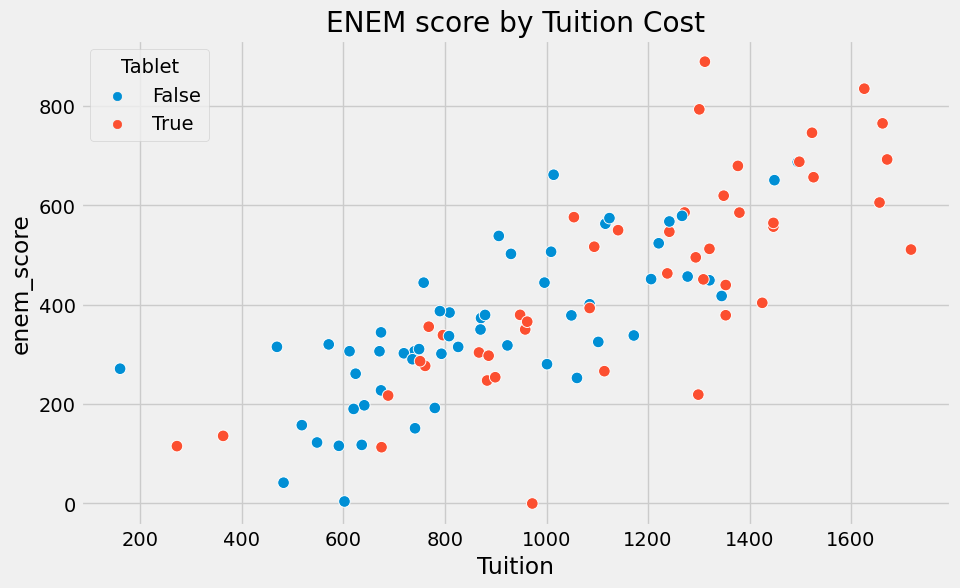

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()

Now that we comprehend the problem, let's explore the solution. We can also outline what's necessary to align association with causation. **If $E[Y_0|T=0] = E[Y_0|T=1]$, then association IS CAUSATION!** Understanding this isn't merely about memorizing the equation; there's a compelling intuitive argument at play. Stating that $E[Y_0|T=0] = E[Y_0|T=1]$ implies that the treatment and control groups are comparable before the treatment. Or, put differently, before receiving the treatment, the treated group's outcomes would mirror those of the untreated group. Mathematically, this results in the vanishing of the bias term:

\[ E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1] = ATT \]

Moreover, if the treated and untreated groups differ solely due to the treatment itself, then $E[Y_0|T=0] = E[Y_0|T=1]$, indicating that the causal impact on the treated mirrors that on the untreated. This occurs because both groups are highly similar:

\[ 
\begin{align}
E[Y_1 - Y_0|T=1] &= E[Y_1|T=1] - E[Y_0|T=1] \\
&= E[Y_1|T=1] - E[Y_0|T=0] \\
&= E[Y|T=1] - E[Y|T=0]
\end{align}
\]

In such a scenario, the **difference in means BECOMES the causal effect**:

\[ E[Y|T=1] - E[Y|T=0] = ATT \]

Additionally, if the treated and untreated groups only differ due to the treatment, we also have $E[Y_1|T=0] = E[Y_1|T=1]$, indicating that both groups respond similarly to the treatment. In this case, treated and untreated groups remain comparable even after treatment. Consequently,

\[ E[Y|T=1] - E[Y|T=0] = ATT = ATE \]

This concept is pivotal, warranting a closer examination, accompanied by visual aids. Let's delve into the illustrations to solidify our understanding. 

In the first figure, a basic average comparison between the treatment and untreated groups is depicted (blue dots represent the untreated):

![img](anatomy1.png)

Notice how the difference in outcomes between the two groups can stem from two causes: the treatment effect or differences in external factors like tuition costs. 

The individual treatment effect is the discrepancy between the unit's outcome and the theoretical outcome under an alternative treatment. However, obtaining the actual treatment effect requires godlike abilities to observe potential outcomes, as depicted in the left figure.

![img](anatomy2.png)

The bias, shown in the right plot, emerges when comparing outcomes of treated and untreated groups if no treatment were administered. If differences exist, factors other than the treatment contribute to the disparities, constituting the bias.

Now, consider a hypothetical scenario with no bias, where tablets are randomly assigned to schools:

![img](anatomy3.png)

In such cases, differences in outcomes between treated and untreated groups solely reflect the average causal effect. This is because no other sources of difference between treatment and untreated exist apart from the treatment itself.

![img](anatomy4.png)

This encapsulates the Herculean task of causal inference: eliminating bias and ensuring comparability between treated and untreated groups to isolate the average treatment effect. Ultimately, causal inference is about unraveling the workings of the world, devoid of illusions and misinterpretations.

## Key Concepts

Thus far, we've elucidated why association doesn't equate to causation and how to align them. We've introduced potential outcome notation as a tool for conceptualizing causal reasoning, presenting statistics as two potential realities based on treatment presence. However, the fundamental challenge lies in only being able to measure one reality, which forms the crux of the causal inference problem.

As we proceed, we'll explore basic techniques for estimating causal effects, starting with the gold standard of randomized trials. Additionally, we'll revisit statistical concepts as needed. We'll conclude with a quote often used in causal inference classes, drawn from a kung-fu series:

> 'What happens in a man's life is already written. A man must move through life as his destiny wills.' -Caine  
'Yes, yet each man is free to live as he chooses. Though they seem opposite, both are true.' -Old Man



# Graphical Causal Models

## Understanding Causality

Have you ever observed how skilled chefs in cooking tutorials on YouTube employ intricate language to describe cooking methods? For instance, they might say, "Simmer the sauce until it thickens to a smooth, creamy texture." If you're a beginner cook, these instructions might seem perplexing at first. Similarly, discussions about causality often involve complex terminology and ideas that can be difficult to grasp. For example, overhearing a conversation about the interplay between income levels and immigration effects in a community might leave you feeling bewildered.

Graphical models serve as a universal language for discussing causality. They not only facilitate communication among enthusiasts of causal inference but also aid individuals in clarifying their own understanding.

To illustrate, let's delve into the concept of conditional independence of potential outcomes, which is a foundational assumption in causal inference:

\[ (Y_0, Y_1) \perp T | X \]

Conditional independence allows us to disentangle the impact of a treatment on an outcome from the influence of other variables. For instance, consider a study examining the effects of a medication on patients' health. If only severely ill patients receive the medication, it might falsely appear that the medication worsens health outcomes. However, by analyzing the medication's impact separately for severe and non-severe cases, we can gain insight into its true effects. This process, referred to as controlling for or conditioning on variable X, ensures that the assignment of treatment is essentially random within each subgroup.

Independence and conditional independence are fundamental concepts in causal inference, albeit they can be challenging to fully grasp. However, by employing clear language to explain these concepts, we can enhance understanding. This is where **causal graphical models** come into play. A causal graphical model provides a visual representation of causal relationships, illustrating the causal links between different variables.

A typical graphical model might look like this:

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

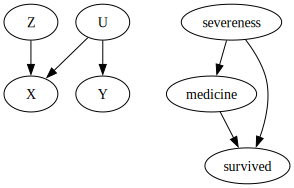

In [8]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

Each node within a graphical model represents a random variable, and we use arrows, or edges, to indicate causal relationships between variables. In the initial graphical model provided, we assert that Z causes X, and both U and Z cause Y. To offer a more tangible example, let's interpret our insights about the effects of medication on patient survival within the second graph. The severity of a patient's condition causes both the administration of medication and their survival, while the medication also directly influences survival. As we'll soon discover, the language of causal graphical models serves to refine our understanding of causality by elucidating our beliefs about the functioning of the world.

## Essential Concepts in Graphical Models

While entire semesters are dedicated to the study of graphical models, for our purposes, it's crucial to comprehend the types of independence and conditional independence assumptions encapsulated within such models. As we'll see, independence permeates through a graphical model like water flowing through a stream. We have the ability to impede or facilitate this flow by how we handle the variables within the model. To grasp this concept, let's examine some common graphical structures and examples. Although they may appear straightforward, they serve as foundational elements for comprehending everything about independence and conditional independence in graphical models.

Let's begin by examining a very basic graph. In this structure, A causes B, and B causes C. Alternatively, we can interpret it as X causing Y, which in turn causes Z. 

Similarly, we can consider the following:

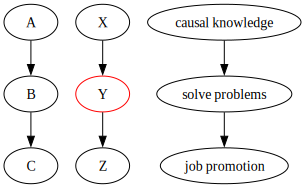

In [9]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

In the first graph, the flow of dependence follows the direction of the arrows. It's important to note that dependence is symmetric, albeit less intuitively so. To illustrate this concept further, let's consider a concrete example: Suppose having expertise in causal inference is the only pathway to solving business problems, and resolving these issues is the sole route to receiving a job promotion. Therefore, possessing knowledge of causality implies the ability to solve problems that lead to promotion. Here, we can infer that job promotion is dependent on causal knowledge. The greater one's proficiency in causal understanding, the higher the likelihood of promotion. Conversely, the higher the chance of promotion, the greater the likelihood of possessing causal knowledge. Otherwise, obtaining a promotion would be challenging.

Now, let's explore the scenario where we condition on an intermediary variable. In this case, the dependence is blocked. Therefore, X and Z become independent given Y. In the graph above, the red coloring indicates that Y is the conditioned variable. Similarly, in our example, if we know that someone is adept at problem-solving, knowledge of their proficiency in causal inference adds no additional insight into their likelihood of receiving a job promotion. Mathematically, this can be expressed as $E[Promotion|Solve \ problems, Causal \ knowledge]=E[Promotion|Solve \ problems]$. Conversely, once we ascertain someone's problem-solving abilities, knowing their job promotion status doesn't provide any further information about their likelihood of possessing expertise in causal inference.

As a general rule, when we condition on an intermediary variable B, the flow of dependence along the direct path from A to C is blocked. Therefore, we have:

$A \not \perp C$

and

$A \perp C | B$

Now, let's consider a fork structure, where the same variable causes two other variables downstream in the graph. In this scenario, dependence flows backward through the arrows, creating a **backdoor path**. We can close this backdoor path and eliminate dependence by conditioning on the common cause.

Let's continue exploring other graphical structures and their implications.

In the first graph, dependence flows along the direction of the arrows. It's noteworthy that dependence is symmetric, albeit less intuitively so. To provide a clearer illustration, consider the following analogy: Imagine that proficiency in causal inference is the only route to solving complex business problems, and resolving these issues is the sole determinant of receiving a job promotion. Consequently, possessing expertise in causality implies the capability to address problems crucial for promotion. Here, we infer that job promotion depends on causal knowledge. The greater one's mastery of causal understanding, the higher the probability of promotion. Conversely, a higher chance of promotion implies a greater likelihood of possessing causal expertise. Without such expertise, securing a promotion would be challenging.

Now, let's delve into the scenario where we condition on an intermediary variable. In this case, dependence is interrupted. Thus, X and Z become independent given Y. In the graph provided, the red shading signifies that Y is the conditioned variable. Similarly, in our example, if we ascertain someone's adeptness at problem-solving, knowing their proficiency in causal inference does not offer additional insights into their likelihood of receiving a job promotion. Mathematically, we can express this as $E[Promotion|Solve \ problems, Causal \ knowledge]=E[Promotion|Solve \ problems]$. Conversely, once we determine someone's problem-solving abilities, knowledge of their job promotion status does not provide further information about their likelihood of possessing expertise in causal inference.

As a fundamental principle, conditioning on an intermediary variable B blocks the flow of dependence along the direct path from A to C. Consequently, we have:

$A \not \perp C$

and

$A \perp C | B$

Now, let's shift our focus to a fork structure, where the same variable causes two other variables downstream in the graph. In such cases, dependence flows backward through the arrows, creating a **backdoor path**. We can close this backdoor path and eliminate dependence by conditioning on the common cause.

Let's proceed with exploring additional graphical structures and their implications.

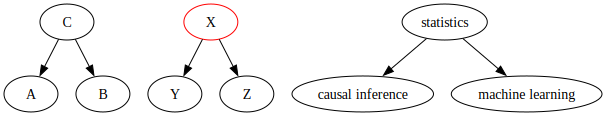

In [10]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

Consider this scenario: Suppose your proficiency in statistics influences your understanding of causal inference and machine learning. If I lack knowledge of your statistical proficiency, then knowing your expertise in causal inference increases the likelihood of you also being skilled in machine learning. This inference stems from the assumption that proficiency in causal inference likely implies proficiency in statistics, which, in turn, increases the likelihood of competence in machine learning.

However, if I condition on your statistical knowledge, then your proficiency in machine learning becomes independent of your proficiency in causal inference. In this case, knowledge of your statistical expertise provides sufficient information to infer your level of machine learning skills. Thus, understanding your proficiency in causal inference adds no further insight.

As a general rule, two variables sharing a common cause are dependent but become independent when we condition on the common cause. Therefore:

$A \not \perp B$

and

$A \perp B | C$

The final structure to consider is the collider. A collider occurs when two arrows converge on a single variable, indicating that both variables share a common effect.

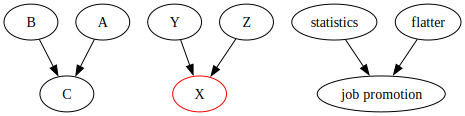

In [11]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

Consider a scenario where there are two paths to securing a job promotion: excelling in statistics or flattering your boss. If I have no information about whether you will receive a promotion, then your proficiency in statistics and your ability to flatter are independent. In other words, knowing your statistical prowess does not provide insight into your flattery skills. However, if you do receive a job promotion, your statistical proficiency becomes indicative of your flattery ability. For instance, if you are lacking in statistics but still receive a promotion, it's likely that you possess strong flattery skills; otherwise, you wouldn't have received the promotion. Conversely, if you lack flattery skills, it implies proficiency in statistics, as this must be the factor leading to your promotion. This phenomenon is often referred to as **explaining away**, where one cause sufficiently explains the effect, making the other cause less probable.

As a general rule, conditioning on a collider opens the path of dependence, while not conditioning on it keeps the path closed. Specifically:

$A \perp B$

and

$A \not \perp B | C$

Understanding these three structural patterns allows us to derive a more comprehensive rule: a path is blocked if and only if:
1. It includes a non-collider that has been conditioned on.
2. It includes a collider that has not been conditioned on and has no descendants that have been conditioned on.

To illustrate the concept of dependence flow in a graphical model, refer to the following image, adapted from a presentation by Mark Paskin at Stanford. The arrows with lines at their tips represent independence, while those without lines signify dependence.
![img](graph-flow.png)

Now, consider the following causal graph and try to identify the independence and dependence relationships:
1. Is $D \perp C$?
2. Is $D \perp C| A $?
3. Is $D \perp C| G $?
4. Is $A \perp F$?
5. Is $A \perp F|E$?
6. Is $A \perp F|E,C$?

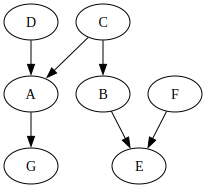

In [12]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Answers**:
1. $D \perp C$: It contains a collider that has **not** been conditioned on.
2. $D \not\perp C| A $: It contains a collider that has been conditioned on.
3. $D \not\perp C| G $: It contains the descendant of a collider that has been conditioned on. Here, G can be viewed as a proxy for A.
4. $A \perp F$: It contains a collider, B->E<-F, that has **not** been conditioned on.
5. $A \not\perp F|E$: It contains a collider, B->E<-F, that has been conditioned on.
6. $A \perp F|E, C$: It contains a collider, B->E<-F, that has been conditioned on, but it also contains a non-collider that has been conditioned on. Conditioning on E opens the path, but conditioning on C closes it again.

Understanding causal graphical models allows us to identify biases in causal inference. As demonstrated, the primary issue often revolves around bias.

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

Graphical models help us diagnose the specific biases we encounter and determine the necessary tools to correct them.

## Confounding Bias


One significant source of bias is confounding, which occurs when the treatment and outcome share a common cause. For instance, consider education as the treatment and income as the outcome. Identifying the causal effect of education on wages is challenging because both factors share a common cause: intelligence. It's plausible that more educated individuals earn higher incomes simply because they are more intelligent, not solely because of their education level. To address confounding bias, we must close all backdoor paths between the treatment and outcome variables. By controlling for all common causes of treatment and outcome, we isolate the direct effect from the treatment to the outcome. In the example, controlling for intelligence means comparing individuals with the same level of intelligence but different levels of education. This ensures that any differences in outcome are solely attributed to differences in education, as intelligence remains constant across groups.

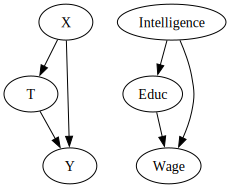

In [13]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

Unfortunately, it's not always feasible to control for all common causes. Sometimes, there are unknown causes or known causes that are difficult to measure. The concept of intelligence exemplifies the latter scenario. Despite considerable efforts, scientists have yet to devise a reliable method for measuring intelligence. For the sake of illustration, let's denote unmeasured variables as U.

Now, suppose for a moment that intelligence does not directly influence your level of education. Instead, it impacts your performance on standardized tests like the SATs. High SAT scores, in turn, increase your likelihood of gaining admission to a prestigious college. Even if we cannot control for unmeasurable intelligence directly, we can still control for SAT scores and thereby close the backdoor path.

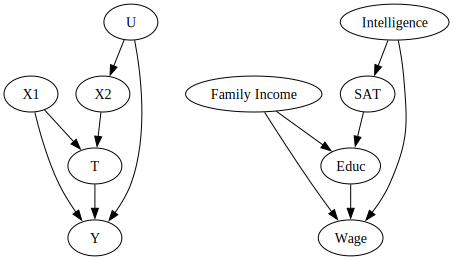

In [14]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

In the depicted graph, conditioning on X1 and X2, which represent SAT scores and family income, respectively, is adequate to close all backdoor paths between the treatment and the outcome. Put differently, $(Y_0, Y_1) \perp T | X1, X2$. Therefore, even if we cannot measure all common causes, achieving conditional independence is still possible by controlling for measurable variables that mediate the effect of unmeasured factors on the treatment. It's important to note that $(Y_0, Y_1) \perp T | X1, U$ is also valid, but since U cannot be observed, we cannot condition on it.

However, what if this scenario does not apply? What if the unmeasured variable directly influences both the treatment and the outcome? Consider the case where intelligence directly causes both education and income. Now, there is confounding in the relationship between the treatment (education) and the outcome (income). Since the confounder (intelligence) is unmeasurable, we cannot directly control for it. Nevertheless, we have other measured variables that can serve as proxies for the confounder. Although these variables are not part of the backdoor path, controlling for them can help mitigate bias, although it may not completely eliminate it. These variables are sometimes referred to as surrogate confounders.

In our example, while we cannot directly measure intelligence, we can measure some of its causes, such as the education levels of the parents, as well as some of its effects, such as IQ or SAT scores. Controlling for these surrogate variables may not entirely eradicate bias, but it can certainly aid in mitigating it.

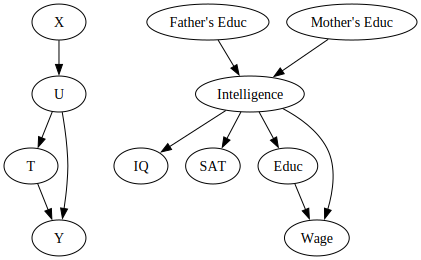

In [15]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Selection Bias

At first glance, it might seem prudent to include every measurable variable in your model to ensure you address confounding bias effectively. However, it's not that straightforward.

![image.png](selection_bias.png)

Selection bias, the second significant source of bias, offers a distinct perspective from confounding bias. While economists often use the term "selection bias" to encompass various biases, we'll maintain this distinction for clarity.

Selection bias frequently emerges when we overcontrol for variables in our analysis. This occurs when the treatment and potential outcome are initially marginally independent but become dependent upon conditioning on a collider.

To illustrate, consider a scenario where, miraculously, you can randomize education to study its impact on wages. However, to ensure you eliminate confounding, you decide to control for numerous variables, including investments. Here's the catch: investment is not a common cause of education and wages; rather, it is a consequence of both. More educated individuals tend to earn higher wages and invest more, while those with higher earnings also tend to invest more. By conditioning on investment, a collider, you inadvertently create a second pathway between the treatment and the outcome. Consequently, it becomes challenging to isolate the direct effect. 

To visualize this, think of controlling for investments as scrutinizing small population subgroups where investment levels are identical to observe the effect of education within those groups. However, in doing so, you unintentionally restrict wage variations. Consequently, you hinder the ability to discern how education impacts wages because you artificially constrain wage fluctuations.

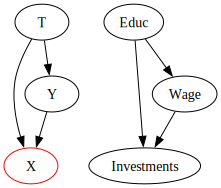

In [16]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Let's illustrate the impact of conditioning on investments using a simplified scenario where both investments and education take only two values: whether individuals invest or not, and whether they are educated or not. Initially, when we don't control for investments, there is no bias term: $E[Y_0|T=1] - E[Y_0|T=0] = 0$, indicating that the wage individuals would have without education, $Wage_0$, remains consistent whether they receive education or not due to randomization.

However, what happens when we condition on investments?

Among those who invest, it's likely that $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. In other words, among investors, individuals who attain high earnings without education are more prevalent, irrespective of their education level. Consequently, the wage for individuals who don't receive education but invest, $Wage_0|T=0$, is probably higher than the wage for the educated group if they didn't receive education, $Wage_0|T=1$. Similarly, a comparable reasoning applies to non-investors, where we likely observe $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Those who don't invest, even with education, probably would have a lower wage without education compared to those who didn't invest and also lacked education.

From a purely graphical standpoint, conditioning on investment explains the relationship between higher education and lower wages within the subset of individuals who invest, resulting in a negative bias $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$.

It's worth noting that all of these observations hold true when conditioning on any descendant of a common effect.

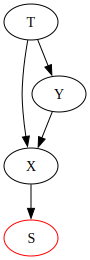

In [17]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

Similarly, when we condition on a mediator of the treatment, we encounter a bias in causal effect estimation. A mediator is a variable situated between the treatment and the outcome, essentially mediating the causal effect. For instance, let's revisit the scenario where education is randomized. However, to ensure accuracy, we choose to control whether individuals have a white-collar job or not. Conditioning on this mediator introduces bias not by opening a front-door path with a collider, but by closing one of the channels through which the treatment operates.

In our example, obtaining a white-collar job represents one of the pathways through which increased education leads to higher pay. By controlling for this mediator, we effectively shut down this pathway, leaving only the direct effect of education on wages open for analysis. This selective conditioning thus distorts our estimation of the true causal effect.

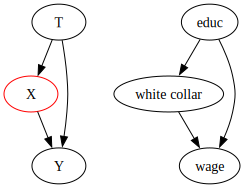

In [18]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

To provide a potential outcome perspective, we understand that due to randomization, the bias is zero: \(E[Y_0|T=0] - E[Y_0|T=1] = 0\). However, upon conditioning on individuals with white-collar jobs, we observe that \(E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]\). This discrepancy arises because individuals who secure white-collar jobs without the aid of education are likely to exhibit greater levels of diligence compared to those who rely on education to attain the same job. Similarly, employing the same rationale, \(E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]\) as those who fail to secure white-collar jobs despite having education are probably less industrious than those who neither secure such jobs nor receive education.

In our scenario, conditioning on the mediator introduces a negative bias, thereby understating the effect of education. This occurs because the true causal effect is positive. Conversely, if the effect were negative, conditioning on a mediator would yield a positive bias. In either case, such conditioning diminishes the perceived strength of the effect.

## References

- [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
- [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)
- [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
- [Mastering 'Metrics](https://www.masteringmetrics.com/)
- [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)
- [Medium Article-Causality Introduction](https://towardsdatascience.com/causality-an-introduction-f8a3f6ac4c4a)